In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from datetime import date
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [77]:
#Reading in the data
data=pd.read_csv('SalesKaggle3.csv\SalesKaggle3.csv')

In [139]:

data.head()

,File_Type,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,Years_Since_Release
0,Historical,0.0,0.0,15,1,682743.0,44.99,8,28.97,31.84,6
1,Historical,0.0,0.0,7,1,1016014.0,24.81,39,0.00,15.54,16
2,Historical,0.0,0.0,0,0,340464.0,46.00,34,30.19,27.97,8
3,Historical,1.0,1.0,4,1,334011.0,100.00,20,133.93,83.15,15
4,Historical,1.0,1.0,2,1,1287938.0,121.95,28,4.00,23.99,11


In [140]:
data.shape

(198917, 11)

In [79]:
data=data.drop(['Order','MarketingType'],axis=1)

In [80]:
#Extracting new column from date column
data['Years_Since_Release']=date.today().year- data['ReleaseYear']
data.head()
data=data.drop('ReleaseYear',axis=1)

In [81]:
#Dropping the ID column
data=data.drop('SKU_number',axis=1)

In [153]:
#Train,test,validation
test=data[(data['File_Type']=='Active') & (data['New_Release_Flag']==1)]
train=data[data['File_Type']=='Historical']


In [154]:

train=train.drop('File_Type',axis=1)
test=test.drop('File_Type',axis=1)


In [114]:
train.SoldCount.value_counts()

0.0     63000
1.0      8179
2.0      2545
3.0      1018
4.0       483
5.0       253
6.0       149
7.0       121
8.0        62
9.0        32
10.0       30
12.0       28
11.0       21
14.0       11
13.0       10
16.0        9
15.0        6
18.0        5
19.0        4
22.0        4
17.0        3
26.0        3
27.0        3
24.0        2
21.0        2
36.0        2
33.0        1
28.0        1
51.0        1
25.0        1
30.0        1
20.0        1
34.0        1
69.0        1
35.0        1
73.0        1
40.0        1
Name: SoldCount, dtype: int64

In [132]:
train.SoldFlag.value_counts(normalize=True)

0.0    0.828991
1.0    0.171009
Name: SoldFlag, dtype: float64

In [155]:
train=train.drop('SoldCount',axis=1)
#val=val.drop('SoldFlag',axis=1)
test=test.drop(['SoldFlag','SoldCount'],axis=1)

In [157]:
#Performing stratified sampling as it has class imbalance
y=train['SoldFlag']
train_X, val_X, train_y, val_y = train_test_split(train.drop('SoldFlag',axis=1),y, test_size = 0.20, random_state = 1234,stratify=y)

## Exploratory Data Analysis

In [88]:
train_X.describe()

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,Years_Since_Release
count,75996.000000,75996.000000,7.599600e+04,75996.000000,75996.000000,75996.000000,75996.000000,75996.000000
mean,4.152534,0.789068,1.222439e+06,98.730594,43.843637,56.708431,47.186160,15.026659
std,3.950739,0.407973,1.540521e+06,78.712358,37.362231,104.758351,129.814719,6.113771
min,0.000000,0.000000,6.800000e+01,0.000000,0.000000,0.000000,0.000000,4.000000
25%,2.000000,1.000000,2.446812e+05,49.950000,22.000000,20.490000,18.740000,11.000000
50%,3.000000,1.000000,7.160165e+05,78.950000,34.000000,44.030000,36.130000,14.000000
75%,6.000000,1.000000,1.554032e+06,127.000000,53.000000,79.380000,56.920000,18.000000
max,99.000000,1.000000,1.666966e+07,3986.310000,1523.000000,14140.210000,19138.790000,86.000000


In [89]:
#Finding missing values in train set
train.isna().sum()

SoldFlag               0
ReleaseNumber          0
New_Release_Flag       0
StrengthFactor         0
PriceReg               0
ItemCount              0
LowUserPrice           0
LowNetPrice            0
Years_Since_Release    0
dtype: int64

In [90]:
#Finding missing values in test set
test.isna().sum()

ReleaseNumber          0
New_Release_Flag       0
StrengthFactor         0
PriceReg               0
ItemCount              0
LowUserPrice           0
LowNetPrice            0
Years_Since_Release    0
dtype: int64

In [91]:
train_1=train[train['SoldFlag']==1]
train_1.describe()

,SoldFlag,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,Years_Since_Release
count,12996.0,12996.000000,12996.000000,1.299600e+04,12996.000000,12996.000000,12996.000000,12996.000000,12996.000000
mean,1.0,4.813096,0.795245,7.312527e+05,113.324873,63.328024,70.207255,43.260726,14.057556
std,0.0,4.111630,0.403538,9.934129e+05,84.916623,51.677562,65.059728,58.044237,5.431379
min,1.0,0.000000,0.000000,1.130000e+02,0.000000,0.000000,0.000000,0.000000,5.000000
25%,1.0,2.000000,1.000000,1.071320e+05,54.950000,32.000000,34.055000,18.490000,10.000000
50%,1.0,4.000000,1.000000,3.973550e+05,94.600000,50.000000,62.010000,33.990000,13.000000
75%,1.0,7.000000,1.000000,9.746345e+05,152.800000,79.000000,97.980000,54.572500,16.000000
max,1.0,66.000000,1.000000,1.559906e+07,2000.000000,1523.000000,2646.730000,4311.150000,66.000000


In [92]:
train_0=train[train['SoldFlag']==0]
train_0.describe()

,SoldFlag,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,Years_Since_Release
count,63000.0,63000.000000,63000.000000,6.300000e+04,63000.000000,63000.000000,63000.000000,63000.000000,63000.000000
mean,0.0,4.016270,0.787794,1.323764e+06,95.720003,39.824286,53.923817,47.995921,15.226571
std,0.0,3.902876,0.408873,1.612194e+06,77.028072,32.226766,110.994332,140.105027,6.226570
min,0.0,0.000000,0.000000,6.800000e+01,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.0,2.000000,1.000000,2.901068e+05,49.000000,21.000000,17.980000,18.780000,11.000000
50%,0.0,3.000000,1.000000,7.977700e+05,75.000000,32.000000,41.500000,36.670000,14.000000
75%,0.0,5.000000,1.000000,1.691554e+06,122.000000,48.000000,74.200000,57.330000,18.000000
max,0.0,99.000000,1.000000,1.666966e+07,3986.310000,1426.000000,14140.210000,19138.790000,86.000000


In [93]:
train_1.ReleaseNumber.value_counts()

2     1848
1     1737
3     1495
4     1244
5     1130
6     1032
0      924
7      840
8      634
9      577
10     451
11     341
12     210
13     174
14      84
15      55
16      44
18      35
17      34
19      21
20      20
21      12
24       6
22       5
23       5
26       5
25       4
27       4
35       3
28       2
34       2
30       2
38       2
41       2
29       2
32       1
39       1
33       1
66       1
51       1
36       1
37       1
53       1
61       1
43       1
Name: ReleaseNumber, dtype: int64

In [96]:
pd.crosstab(train['ReleaseNumber'],train['SoldFlag'])

SoldFlag,0.0,1.0
ReleaseNumber,,
0,5606,924
1,7763,1737
2,14219,1848
3,8932,1495
4,6229,1244
5,4763,1130
6,3774,1032
7,2971,840
8,2350,634


In [31]:
pd.crosstab(train['Years_Since_Release'],train['SoldFlag'])

SoldFlag,0.0,1.0
Years_Since_Release,,
4,1,0
5,78,2
6,537,59
7,1999,359
8,2940,745
9,3831,1075
10,4339,1262
11,4984,1285
12,4789,1114


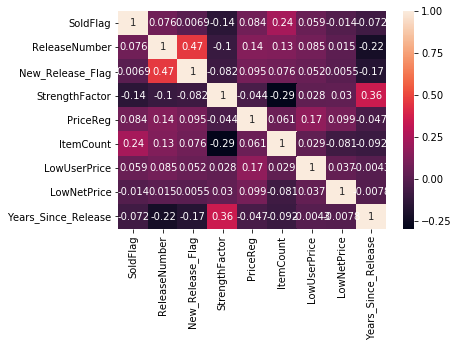

In [34]:
#Finding correlation between the attributes
sns.heatmap(train.corr(),annot=True)

#### We can see that there is no strong correlation , though some columns like ReleaseNumber and New_Release_Flag ,Years_Since_Release and StrengthFactor etc. are correlated.

In [35]:
train.New_Release_Flag.value_counts()

1    59966
0    16030
Name: New_Release_Flag, dtype: int64

In [42]:
pd.crosstab(train.New_Release_Flag,train.SoldFlag,normalize='index')

SoldFlag,0.0,1.0
New_Release_Flag,,
0,0.833999,0.166001
1,0.827652,0.172348


In [67]:
pd.crosstab(train.ReleaseNumber,train.New_Release_Flag)

New_Release_Flag,0,1
ReleaseNumber,,
0,6530,0
1,9500,0
2,0,16067
3,0,10427
4,0,7473
5,0,5893
6,0,4806
7,0,3811
8,0,2984


#### Except Release 0 and 1 ,all other releases have a future release

### Model Building 

In [159]:
#Random Forest
rf = RandomForestClassifier(n_estimators = 100, random_state = 42,oob_score=True,class_weight='balanced')
# Train the model on training data
rf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

In [160]:
rf.oob_score_

0.8327521547470228

In [161]:
predictions_val=rf.predict(val_X)

In [162]:
predictions_val

array([0., 0., 0., ..., 0., 0., 0.])

In [172]:
prob_val=rf.predict_proba(val_X)

In [176]:
#Using AUC score as it's independent on threshold
roc_auc_score(val_y,prob_val[:, 1])

0.719233594480415

In [177]:
predictions_test=rf.predict(test)

In [181]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_X.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
feature_importances

[('StrengthFactor', 0.19),
 ('ItemCount', 0.18),
 ('LowUserPrice', 0.17),
 ('PriceReg', 0.15),
 ('LowNetPrice', 0.15),
 ('Years_Since_Release', 0.09),
 ('ReleaseNumber', 0.07),
 ('New_Release_Flag', 0.01)]

### Future Scope
1.Hyperparameter tuning
2.Can use croos validation
3.Can experiment with assigning class weights while training the model(I have used "balanced" keyword)